In [20]:
from solar_system import DynamicalSystem, CelestialBody
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

We generated a `SeedSequence` using `np.random.SeedSequence()` and obtained the result: `seq = SeedSequence( entropy=248328445779126196167766975569392299924,)`. This value is then stored in the seed, enabling us to reproduce the results of the simulation.

In [27]:
def initialize_bodies(N, box_size,seed, min_mass = 0, max_mass = 100):
    """
    Initialize a list of celestial bodies with random initial conditions.

    Parameters:
    - N (int): Number of bodies to initialize.
    - box_size (float): Size of the box representing the system's boundaries.

    Returns:
    - list: List of initialized CelestialBody objects.
    """
    rng1 = np.random.default_rng(seed)
   

    v0 = rng1.uniform(-box_size / 2, box_size / 2, (N, 3))
    x0 = rng1.uniform(-box_size / 2, box_size / 2, (N, 3))
    mass = min_mass + (max_mass - min_mass) * rng1.random(size=(N, 1))

    bodies = []
    for i in range(N):
        bodies.append(CelestialBody(box, mass=mass[i, 0], position=x0[i, :], velocity=v0[i, :]))

    return bodies

def simulate_system(system, sim_period):
    """
    Simulate the dynamical system for a given number of time steps.

    Parameters:
    - system (DynamicalSystem): The dynamical system to simulate.
    - sim_period (int): Number of time steps to simulate.
    """
    for _ in range(sim_period):
        system.dynamical_interaction()
        system.update_all()

def plot_system(bodies, x0, v0):
    """
    Plot the initial and final states of the solar system.

    Parameters:
    - bodies (list): List of CelestialBody objects representing the bodies in the system.
    - x0 (numpy.ndarray): Initial positions of the bodies.
    - v0 (numpy.ndarray): Initial velocities of the bodies.
    """
    fig = plt.figure(figsize=(box_size / 10, box_size / 10))
    ax1 = fig.add_subplot(3, 1, 1, projection="3d")
    ax2 = fig.add_subplot(3, 1, 2, projection="3d")
    ax3 = fig.add_subplot(3, 1, 3, projection="3d")
    fig.tight_layout()

    n = 0
    for body in bodies:
        ax1.scatter(*x0[n], marker="o", color="green", s=np.maximum(body.mass, 60))
        ax1.quiver(*x0[n], *v0[n], color='orange', length=np.linalg.norm(v0[n]), normalize=True, arrow_length_ratio=0.1)

        ax2.scatter(*body.position, marker="o", color="blue", s=np.maximum(body.mass, 60))
        ax2.quiver(*body.position, *body.velocity, color='red', length=np.linalg.norm(body.velocity), normalize=True,
                   arrow_length_ratio=0.1)

        ax3.scatter(*body.position, marker="o", s=np.maximum(body.mass, 10), color="blue")
        ax3.scatter(*x0[n], marker="o", s=np.maximum(body.mass, 10), color="green")

        n += 1

    ax1.view_init(10, 0)
    ax2.view_init(10, 0)
    ax3.view_init(10, 0)

    # Add labels
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Initial Positions and Velocities')

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('Positions and Velocities after the evolution')

    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('Line Plot - Positions')

    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


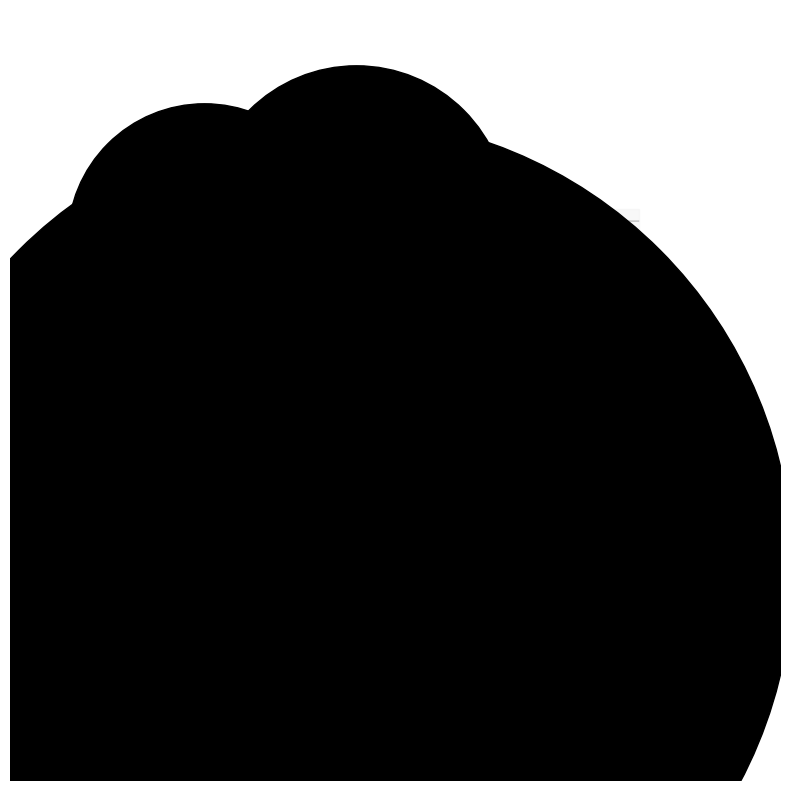

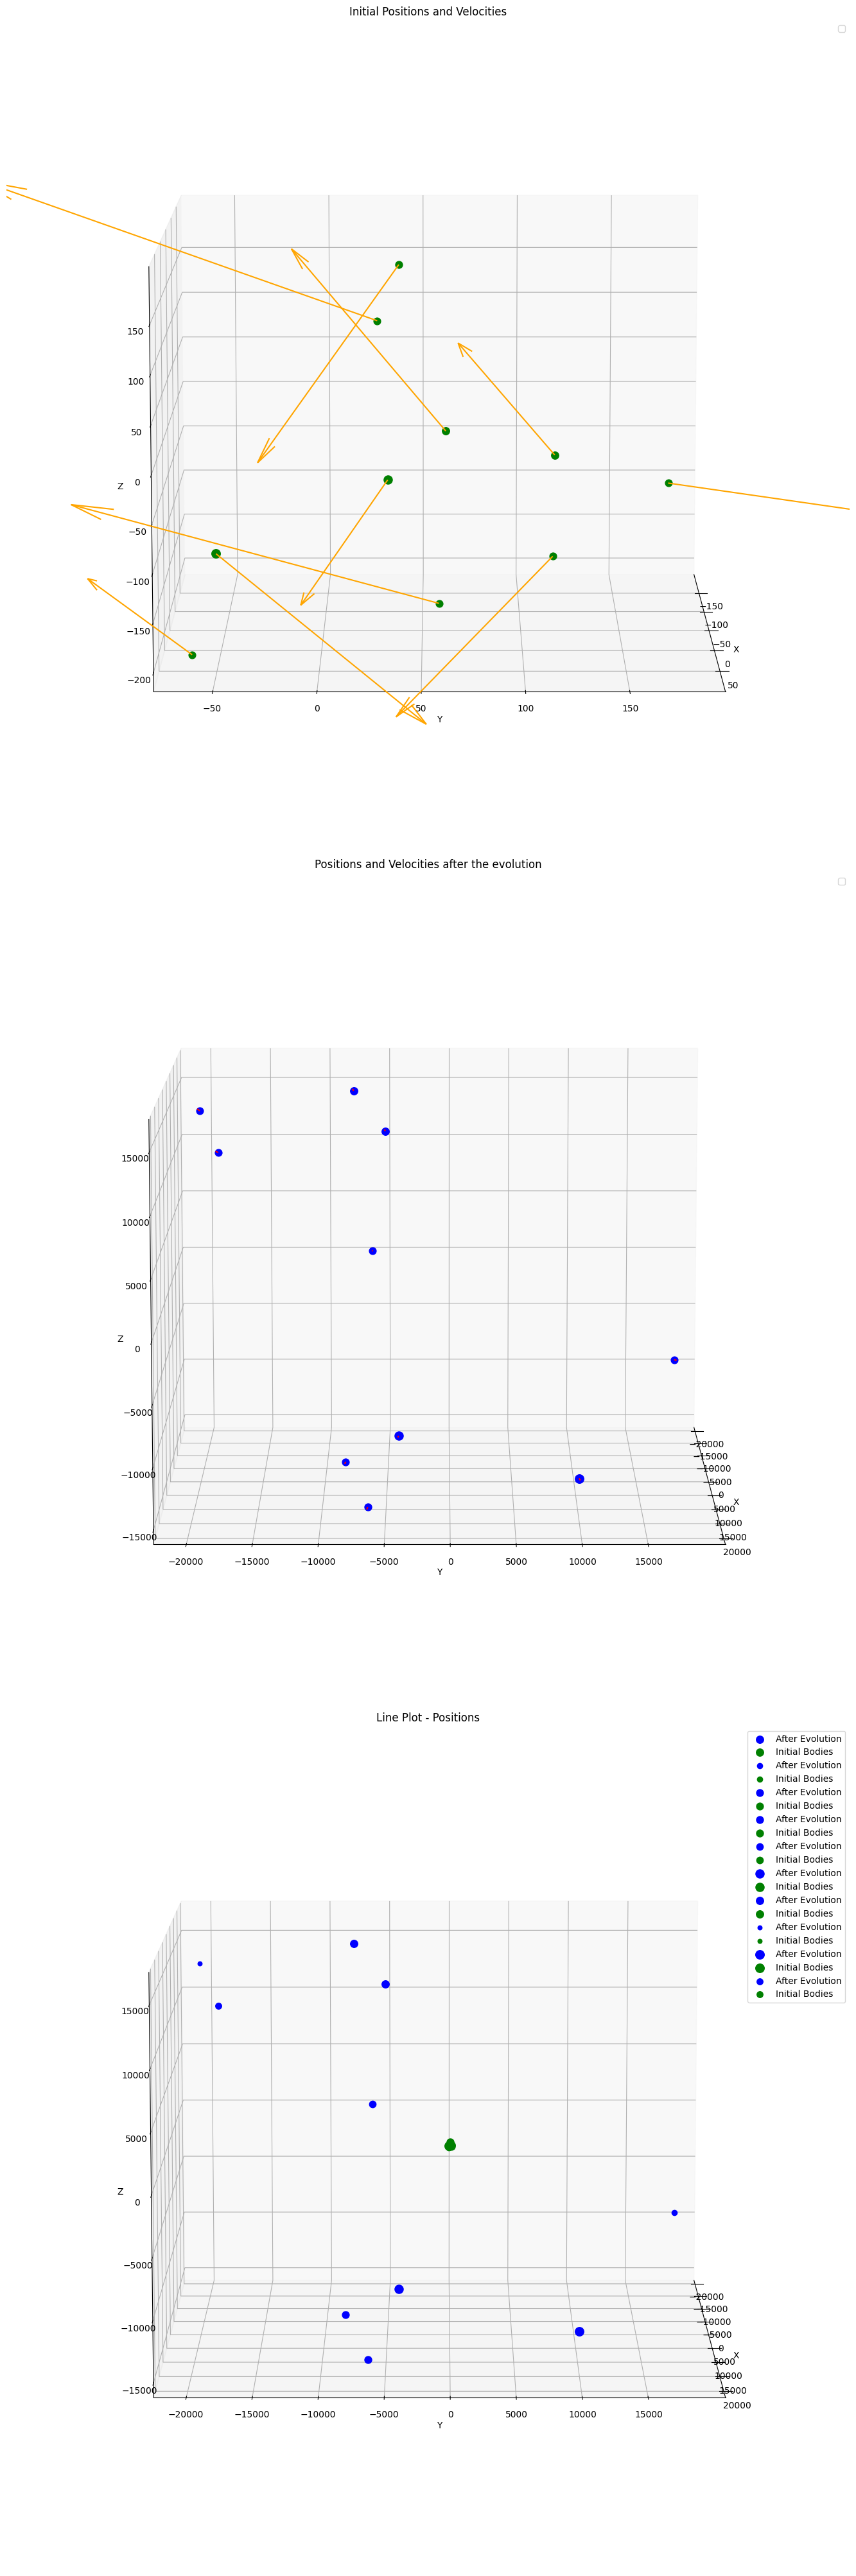

In [28]:
# Parameters/constants
seed = 248328445779126196167766975569392299924
box_size = 400
N = 10
sim_period = 100

# Initialize the system
box = DynamicalSystem(box_size)
bodies = initialize_bodies(N, box_size,seed)
x0 = np.array([body.position for body in bodies])
v0 = np.array([body.velocity for body in bodies])

# Simulate the system
simulate_system(box, sim_period)

# Plot the results
plot_system(bodies, x0, v0)